KLUE-TC(YNAT) dataset (2800개)

- Labeling Error - 1000개는 라벨을 임의로 바꿈
→ 올바른 라벨로 재맵핑 필요
- Random Noise - 1600개는 text에 노이즈를 추가. 임의의 char 중 20~80%를 랜덤으로 다른 아스키코드로 대체
→ 높은 노이즈를 가지는 text는 제외, 낮은 샘플은 복구가 필요
→ 사람이 개별 판단하지 말 것. 자동 detection이 가능하게 하여 수정하거나, 삭제하거나 진행
- Normal Dataset - 200개

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
def mapping_label(df):
    # 딕셔너리로 매핑 정의
    label_map = {
        0:'생활문화',1:'스포츠',2:'정치',3:'사회',4:'IT과학',5:'경제',6:'세계'
    }
    
    # map 함수를 사용하여 변환
    df['target'] = df['target'].map(label_map)
    
    return df

# 사용
df = mapping_label(df)
df.head(20)

,ID,text,target
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,IT과학
1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,사회
2,ynat-v1_train_00002,"m 김정) 자주통일 새,?r열1나가야1보",정치
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,경제
4,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발] $비해 감시 강화,세계
5,ynat-v1_train_00005,美성인 6명 중 1명꼴 배우자·연인 빚 떠안은 적 있다,생활문화
6,ynat-v1_train_00006,프로야구~롯TKIAs광주 경기 y천취소,스포츠
7,ynat-v1_train_00007,아가메즈 33득점 우리카드 KB손해보험 완파…3위 굳...,IT과학
8,ynat-v1_train_00008,朴대통령 얼마나 많이 놀라셨어요…경주 지진현장 방문종합,세계
9,ynat-v1_train_00009,듀얼심 아이폰 하반기 출시설 솔솔…알뜰폰 기대감,IT과학


In [4]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      2800 non-null   object
 1   text    2800 non-null   object
 2   target  2800 non-null   object
dtypes: object(3)
memory usage: 65.8+ KB
None
                         ID                              text target
count                  2800                              2800   2800
unique                 2800                              2800      7
top     ynat-v1_train_00000  정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보     경제
freq                      1                                 1    419
                    ID                              text target
0  ynat-v1_train_00000  정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보   IT과학
1  ynat-v1_train_00001       K찰.국DLwo 로L3한N% 회장 2 T0&}송=     사회
2  ynat-v1_train_00002            m 김정) 자주통일 새,?r열1나가야1보     정치
3  ynat-v1_train_00003     갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩     경제
4  

target
IT과학    406
경제      419
사회      385
생활문화    397
세계      395
스포츠     410
정치      388
Name: count, dtype: int64


C:\Users\seohy\AppData\Local\Temp\ipykernel_20776\2334285863.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
c:\Users\seohy\Desktop\boostenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\seohy\Desktop\boostenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\seohy\Desktop\boostenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\seohy\Desktop\boostenv\lib\site-packages\IPython\cor

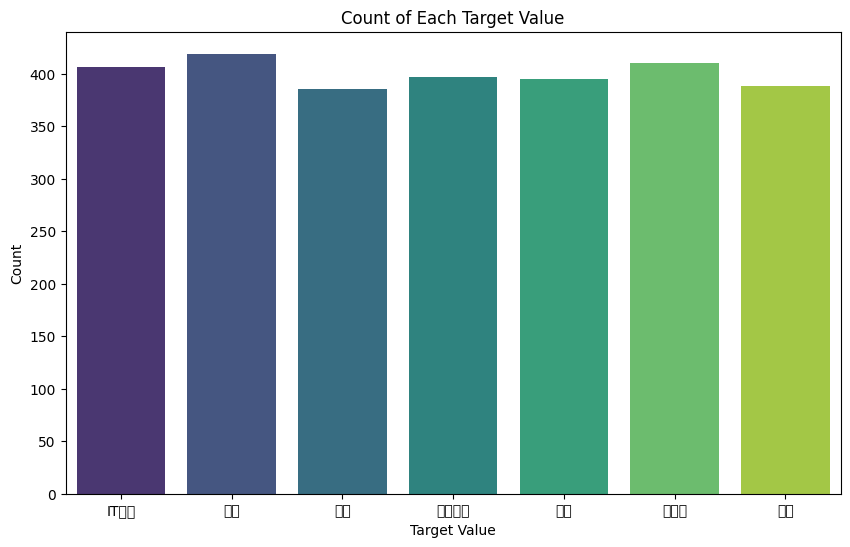

In [5]:
target_counts = df['target'].value_counts().sort_index()
print(target_counts)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title('Count of Each Target Value')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.xticks(range(0, 7))  # target의 범위에 맞춰 x축 값 설정
plt.show()

In [6]:
# target 값에 따라 데이터프레임 정렬
df_sorted = df.sort_values(by='target')

# 각 target 값에 대해 샘플 출력
target_values = df_sorted['target'].unique()

for target in target_values:
    print(f"Target: {target}")
    samples = df_sorted[df_sorted['target'] == target].sample(n=10, random_state=42)
    display(samples)  # Jupyter Notebook에서 DataFrame을 보기 좋게 출력

Target: IT과학


,ID,text,target
1285,ynat-v1_train_01285,미래는 게임…애플·삼성 신제품 출시 맞춰 게임 플랫폼 내놔,IT과학
2306,ynat-v1_train_02306,갤0시S8 개통 이틀a에 주Y.재- 부족 (,IT과학
2625,ynat-v1_train_02625,.달 CES %굴#N바@은^새a|더o폰I중저o폰O rb,IT과학
1013,ynat-v1_train_01013,p:카자D 첨단f료시스템 y/N술개_X협약,IT과학
941,ynat-v1_train_00941,신간 잘못 알려진 미니스커트 경제학,IT과학
1326,ynat-v1_train_01326,노트르담 화재 이틀만에…휘발유 들고 美성당 침입한 남성 체포,IT과학
829,ynat-v1_train_00829,A용+간 +ZmS SCi앱은 !DL네이버 g드 2위,IT과학
1855,ynat-v1_train_01855,100번째 등판 류현진 통증 느껴 자진 강판…1⅔이닝...,IT과학
2511,ynat-v1_train_02511,NH투자 IRP 비보장상품 수익률 업계 1위,IT과학
2218,ynat-v1_train_02218,꿈의 전자파 테라헤르츠파 세기 조절한다,IT과학


Target: 경제


,ID,text,target
2404,ynat-v1_train_02404,올n)이Z분야 1q;체 |UL업E 126개W&/·3V억YM원,경제
1912,ynat-v1_train_01912,">독 작년 세_시U5파트D분양권 Yey1만3…""1#! 투&",경제
2498,ynat-v1_train_02498,LGU> 컴저C은4과 '고 연 t% 금리 적금 출시,경제
666,ynat-v1_train_00666,증시신상품 한투증권 PF대출채권 투자 부동산펀드 판매,경제
448,ynat-v1_train_00448,m7eh 4출x?진 Wf…2\기부터 점[ 회복r전,경제
1675,ynat-v1_train_01675,시원하게 쪽배축제 즐기세요,경제
2380,ynat-v1_train_02380,北매체 로켓 발사 성공에 온나라 경축 분위기,경제
1793,ynat-v1_train_01793,"7- 신%`/k합정보$m,신설…M>정보j등 제공",경제
832,ynat-v1_train_00832,최지만 보스턴전 6호 솔로포 포함 멀티히트종합,경제
1674,ynat-v1_train_01674,"~스코i8Z,r b모 {]8로 방음CN 공f<C",경제


Target: 사회


,ID,text,target
932,ynat-v1_train_00932,코리아^레길 민간추진협의회 2<일 출u식,사회
2149,ynat-v1_train_02149,정선 산불 진화 안간힘,사회
2456,ynat-v1_train_02456,제주소식 TBN 제주 개국 2주년 14시간 특별생방송,사회
1014,ynat-v1_train_01014,질병관리_ 서울n재~외신5자3H취재여건 만N도 AC,사회
1062,ynat-v1_train_01062,"LG화학 안k ,보 Q 된 사업은 안(한다…고강도F대책r발표",사회
2422,ynat-v1_train_02422,자사주 매입 자신감 드러낸 조준호…G6 성공할까종합,사회
2591,ynat-v1_train_02591,영문 0:m공직자W신고: 병({U9 인\넷 발급z가능,사회
1605,ynat-v1_train_01605,프로배구 OK저축은행 한국전력에 셧아웃 승리…5위 도약,사회
497,ynat-v1_train_00497,김영란법 때문에E애플 t이폰 초청70못받7 r국 언.,사회
2210,ynat-v1_train_02210,강릉원주대X개A일`3*#16일e 2주*연기,사회


Target: 생활문화


,ID,text,target
541,ynat-v1_train_00541,]국문협+U상에D임f훈]안K순·n육Oa박예R,생활문화
349,ynat-v1_train_00349,주터키한국문화원 개원 8주년 행사 개최,생활문화
2589,ynat-v1_train_02589,나비 v천마리가BlK에b 에+*드n|리% 나 Nc P픈,생활문화
1497,ynat-v1_train_01497,a/모.쇼 벤츠*스포X카 성SF XHEV B셉트카 5개,생활문화
600,ynat-v1_train_00600,한]날-느낌있는 Y글U /lR세요,생활문화
2668,ynat-v1_train_02668,스타필드5하남 개`B후w이틀동안 !3만# 방:,생활문화
623,ynat-v1_train_00623,서울시립미술관서 추상화가 한묵 첫 유고전 개막,생활문화
2007,ynat-v1_train_02007,靑 대단히 중요한 순방…丁의장 사드 발언 우려,생활문화
402,ynat-v1_train_00402,KT 수자원·국토정보공사와 데이터 중심 스마트시티 협력,생활문화
979,ynat-v1_train_00979,외국E 좋Z1Blo$다 n3^좋아하고 사&하는/작품 w0,생활문화


Target: 세계


,ID,text,target
1056,ynat-v1_train_01056,프로농구연맹 어시스터 모집,세계
2344,ynat-v1_train_02344,"파^·테6M%uoX쓰Ya대란.지b유vE0K@ 35 프랑5""비상",세계
1351,ynat-v1_train_01351,로봇 손이 스마트폰 잡을 수 있도록 돕는 인공 피부 개발,세계
1187,ynat-v1_train_01187,HDC 부동산114 자회사로 편입,세계
2697,ynat-v1_train_02697,n탈.냐 [반 스페인의 노란 리rO철거지' 거Lt -O,세계
2692,ynat-v1_train_02692,무~림 입국금지 ?속 트y프 `임 /던시장은 P외종8l보,세계
394,ynat-v1_train_00394,8Ih쿠르>군0 시리R rmn순찰…bN|뒤 qa,세계
1641,ynat-v1_train_01641,이탈리아서 전통적 가족가치 옹호 회의…시대착오적 맞불 집회,세계
1346,ynat-v1_train_01346,o국 초등학교 3부% 투Y 교육 시킨-,세계
2095,ynat-v1_train_02095,( 꽁%잡2 6중조업 /P…{p;양u어획b경쟁 .g v망,세계


Target: 스포츠


,ID,text,target
1739,ynat-v1_train_01739,j로Qn2부 k/ 1위 성남 b고h선두추격{잰걸음,스포츠
1314,ynat-v1_train_01314,올림X 최종 주자에게 ^V되는 성o,스포츠
74,ynat-v1_train_00074,월드9U천재 사령탑 S시코 !'O오 감독 한국전R...,스포츠
263,ynat-v1_train_00263,임도헌 감독 젊은 선수들 자신감 얻었다…내년 1월 진짜 승부,스포츠
478,ynat-v1_train_00478,하루평균 수출 감소폭 전월보다 줄어…향후 예단 쉽지 않아,스포츠
859,ynat-v1_train_00859,7 들어올L때b (는W두산·SK…선발 c승에 불과.#롯데,스포츠
679,ynat-v1_train_00679,;!21P안OoD3득점N대i발4후`-= 5{) 해l 6|승,스포츠
1534,ynat-v1_train_01534,트럼프 中 거래 원해도 美 준비 안돼…이란 체제전환 요구안해,스포츠
1026,ynat-v1_train_01026,"아r널R벵거 감B Y?u 비\에 감u에 o~ ,볍다...",스포츠
24,ynat-v1_train_00024,서울에 다시 오존주의보…도심·서북·동북권 발령종합,스포츠


Target: 정치


,ID,text,target
2370,ynat-v1_train_02370,세계 첫 AI 축구 월드컵 KAIST서 개막…12개국 29팀 참가,정치
2686,ynat-v1_train_02686,"北h평양El반미y교양 거c 중""계급교양관 개관",정치
763,ynat-v1_train_00763,D{헌장e 서명하는 k부겸 장T,정치
2789,ynat-v1_train_02789,"이총리,세4. H직 완fl지 못해E할 일 꽤;남아",정치
124,ynat-v1_train_00124,발언하\ 박광E,정치
849,ynat-v1_train_00849,북HTe*k등장8 z정은u17! 현지nS N적비,정치
872,ynat-v1_train_00872,@대통령 Jk家 의혹 계기로pD벌WBF은닉XTq정.준,정치
2592,ynat-v1_train_02592,[ '대통령재벌 총수 u공& 면담 경위 수사종b,정치
1530,ynat-v1_train_01530,힐러리 본선에 성큼…트럼프 자력후보 희망 살려 전망은 불투명,정치
906,ynat-v1_train_00906,北김정은 당 대회 함경;도·황$북도·h선시 대표로 추[,정치


In [7]:
# 화살표가 포함된 행을 필터링
arrows = ['→', '←', '↑', '↓', '↔']
mask = df['text'].str.contains('|'.join(arrows))  # 화살표 기호가 포함된 행 찾기
df_with_arrows = df[mask]

# 결과 출력
display(df_with_arrows)

,ID,text,target
134,ynat-v1_train_00134,코오롱플라스틱 1분기 연결 영업익 58억원…138%↑,세계
154,ynat-v1_train_00154,[반기 전}FjQQ 74Q여z…L년보~ 3.1%↓,경제
156,ynat-v1_train_00156,GS칼텍스 IBK기업은행과 세터 이나연↔이고은 트레이드,경제
169,ynat-v1_train_00169,e5 >사채 @행V0.9조원…Or대비O55z↑,경제
186,ynat-v1_train_00186,KB증권 농심 4분기 라면 부문 실적개선…목표주가↑,세계
203,ynat-v1_train_00203,j우증권 오리X 중D 성장둔s…목표가↓,경제
491,ynat-v1_train_00491,11월 주식 발행액 전월비 60% 증가…IPO·유상증자↑,IT과학
575,ynat-v1_train_00575,靑 참모교체 → 책임총리 내각 단계적 쇄신론도 대두,정치
596,ynat-v1_train_00596,살 D;w없다 세계 집값 10q>'50%↑…韓Q30년새 3K}%↑,경제
745,ynat-v1_train_00745,서울 표준주택 공시가 17.75%↑…15억 초과 고가주택 정밀 조준종합2보,IT과학


In [8]:
# 공백으로 대체
df['text'] = df['text'].str.replace('…', ' ', regex=False)
df['text'] = df['text'].str.replace('...', ' ', regex=False)
df['text'] = df['text'].str.replace('·', ' ', regex=False)
# 화살표 기호 의미 대체
df['text'] = df['text'].str.replace('→', '에서', regex=False)
df['text'] = df['text'].str.replace('↑', '상승', regex=False)
df['text'] = df['text'].str.replace('↓', '하락', regex=False)
df['text'] = df['text'].str.replace('↔', ' ', regex=False)

In [9]:
# 정규 표현식 정의: 소수점 뒤에 숫자가 있으며, 그 뒤에 '%'가 있는 패턴
pattern = r'\d+\.\d+%'

# '.숫자%' 구성으로 이루어진 데이터 필터링
df_filtered = df[df['text'].str.contains(pattern, regex=True)]

# 결과 출력
display(df_filtered)

,ID,text,target
133,ynat-v1_train_00133,?씨D m년 h업8 16<K* h4.8%3,경제
154,ynat-v1_train_00154,[반기 전}FjQQ 74Q여z L년보~ 3.1%하락,경제
473,ynat-v1_train_00473,네이버 검색 광고 전체 광고 매출의 82.4% 차지,생활문화
745,ynat-v1_train_00745,서울 표준주택 공시가 17.75%상승 15억 초과 고가주택 정밀 조준종합2보,IT과학
929,ynat-v1_train_00929,(난해 OV은행 신용대w금리 3.2%p하락(#자 2천= 감소,경제
1262,ynat-v1_train_01262,KB증권 2분기 영업익 1천5억원 2.21% 증가,IT과학
1485,ynat-v1_train_01485,유바이오로직<-S분기X~업익 l)억원lU?3.7% 증가,경제
1577,ynat-v1_train_01577,국고채 금리 일제히 하락 3년물 연 1.717%,경제
1913,ynat-v1_train_01913,국제유가 사흘만에 반등 WTI 이번주 2.2%하락,정치
2041,ynat-v1_train_02041,국제유가 곡물가하락 올해 농업경영비 3.3% 감소 전망,정치


In [10]:
# 특수 기호의 패턴 정의
# 이 예시에서는 영숫자 이외의 모든 기호를 특수 기호로 간주합니다.
# special_char_pattern = r'[^가-힣A-Z\u4E00-\u9FFF\s0-9]'
# .숫자% 형식을 제외하고, ㎜도 특수 기호에서 제외
special_char_pattern = r'(?<!\d)\.(?!\d)|(?<!\d)%|[^가-힣A-Z\u4E00-\u9FFF\s0-9\.%㎜㎡]'

# 각 text에 포함된 특수 기호의 개수를 세는 함수 정의
def count_special_characters(text):
    return len(re.findall(special_char_pattern, text))

# 데이터프레임에 새로운 열 추가
df['special_char_count'] = df['text'].apply(count_special_characters)
df['special_char_ratio'] = df['special_char_count'] / df['text'].str.len()

df_sorted = df.sort_values(by='special_char_ratio', ascending=False)

# 결과 출력
display(df_sorted[['text', 'target', 'special_char_count', 'special_char_ratio']].head(20))

,text,target,special_char_count,special_char_ratio
624,"사건!>실""를 b$#라 #극)]체O.;월f:?",생활문화,14,0.560000
2413,"전W;참c 이nd 유j]""m객ie((우려` ?<. 개조",세계,16,0.533333
1203,nO통령z\후 p싱턴으로 ^R!與지p부 @re-#{{\,정치,15,0.500000
2765,"$G ;!p 서울 |곳 나vo객 =적""bs 귀s,d거)",사회,15,0.500000
2275,더*} ]i대+ 김현권!v원a}_대8*vdL줄!알았d,정치,15,0.500000
2105,"^r^[P홀w2019년H'v요?서트vYp 세,#uNs[cJ",생활문화,16,0.500000
1383,H@마 대통령uir6후m워싱턴_(ymy무( 개k_z정,세계,14,0.482759
2013,에+-W[성엘에스티에bm00yxr규$ -:,경제,11,0.478261
1228,디딤. 대;에도g모-#신> !Om*,경제,9,0.473684
247,m시판 코.아 Vvg페ogt,IT과학,7,0.466667


In [11]:
# 출력 옵션을 설정하여 모든 행이 표시되도록 함
pd.set_option('display.max_rows', None)

# special_char_ratio가 0.2 이상인 데이터 필터링
df_high_ratio = df_sorted[df_sorted['special_char_ratio'] >= 0.041]
print(len(df_high_ratio))

# 결과 출력
display(df_high_ratio[['text', 'target', 'special_char_count', 'special_char_ratio']])

# 출력 옵션을 원래대로 복구
pd.reset_option('display.max_rows')


1604


,text,target,special_char_count,special_char_ratio
624,"사건!>실""를 b$#라 #극)]체O.;월f:?",생활문화,14,0.560000
2413,"전W;참c 이nd 유j]""m객ie((우려` ?<. 개조",세계,16,0.533333
1203,nO통령z\후 p싱턴으로 ^R!與지p부 @re-#{{\,정치,15,0.500000
2765,"$G ;!p 서울 |곳 나vo객 =적""bs 귀s,d거)",사회,15,0.500000
2275,더*} ]i대+ 김현권!v원a}_대8*vdL줄!알았d,정치,15,0.500000
2105,"^r^[P홀w2019년H'v요?서트vYp 세,#uNs[cJ",생활문화,16,0.500000
1383,H@마 대통령uir6후m워싱턴_(ymy무( 개k_z정,세계,14,0.482759
2013,에+-W[성엘에스티에bm00yxr규$ -:,경제,11,0.478261
1228,디딤. 대;에도g모-#신> !Om*,경제,9,0.473684
247,m시판 코.아 Vvg페ogt,IT과학,7,0.466667


In [17]:
# 'IoT'가 포함된 행 필터링
df_with_iot = df_high_ratio[df_high_ratio['text'].str.contains('IoT')]

# 결과 출력
display(df_with_iot[['text']])

,text
1459,"악성""드[감$kIoTR기기 saeS #료법E3려j`"
1750,5$ UmD IoT4접n 평창1림K 준비 F착
638,IoT로 쓰레기통 관리해요
1132,KT카스 NBIoT 사업협력을 위한 업무협약
2302,SK텔레콤 IoT 네트워크 기반 맞춤 서비스


In [15]:
# special_char_count가 1인 행 확인하기
df_special_char_count_1 = df_high_ratio[df_high_ratio['special_char_count'] == 1]

# 결과 출력
display(df_special_char_count_1)

,ID,text,target,special_char_count,special_char_ratio
124,ynat-v1_train_00124,발언하\ 박광E,정치,1,0.125000
2638,ynat-v1_train_02638,w콩 T립 깃발,세계,1,0.125000
866,ynat-v1_train_00866,m8야L8러가G,생활문화,1,0.125000
2732,ynat-v1_train_02732,7설 0워도t치워도,생활문화,1,0.100000
890,ynat-v1_train_00890,갯벌도 얼려버린^한파,생활문화,1,0.090909
18,ynat-v1_train_00018,개R전 연w정연H 작가,생활문화,1,0.083333
1226,ynat-v1_train_01226,r사말하는 미즈타니7사장,사회,1,0.076923
2353,ynat-v1_train_02353,5GX MES 플s폼이란,IT과학,1,0.076923
638,ynat-v1_train_00638,IoT로 쓰레기통 관리해요,정치,1,0.071429
2756,ynat-v1_train_02756,항소심2선고 출석하는 이%택,사회,1,0.066667
